In [4]:
from google.colab import files
files.upload()

Saving test-32data.save to test-32data.save


In [0]:
import json
import pickle

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.layers import *
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam

np.random.seed(1234)

In [45]:
!ls

datalab  keras.save  test-32data.save


In [36]:
def get_image_data(num_training=63000, num_validation=1000, num_test=10000):
    """
    Load the image dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw image data
    image_dir = "test-32data.save"

    data = pickle.load(open(image_dir, 'rb'))
    X_train, y_train, X_test, y_test = data['data'][:80000],data['label'][:80000],data['data'][80000:],data['label'][80000:]
    X_train=np.array(X_train,'float64')
    y_train= np.array(y_train,'float64')
    X_test=np.array(X_test,'float64')
    y_test=np.array(y_test,'float64')
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test
  
 

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_image_data()
y_train=y_train.reshape(-1,42)
y_val=y_val.reshape(-1,42)
y_test=y_test.reshape(-1,42)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

model = Sequential([
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
        input_shape=(32, 32, 3)
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Flatten(),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
#         Dense(
#             output_dim=30,
#         ),
    Dense(
        output_dim=42,
#             weights=(pca_eigenvectors, pca_mean),
        trainable=False
    )
])

model.compile(
    optimizer=Adam(),
    loss='mse'
)

model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=50,
)


Train data shape:  (63000, 32, 32, 3)
Train labels shape:  (63000, 42)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 42)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(32, 32, 3..., kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: UserWarning: Update your `Dense` call to the Keras 2 API:

Epoch 1/50
63000/63000 [==============================] - 8s 128us/step - loss: 13.8938
Epoch 2/50
63000/63000 [==============================] - 8s 120us/step - loss: 5.3227
Epoch 3/50
63000/63000 [==============================] - 8s 119us/step - loss: 3.9940
Epoch 4/50
45800/63000 [====================>.........] - ETA: 2s - loss: 3.2967

63000/63000 [==============================] - 7s 119us/step - loss: 3.2424
Epoch 5/50
63000/63000 [==============================] - 7s 119us/step - loss: 2.7932
Epoch 6/50
63000/63000 [==============================] - 8s 119us/step - loss: 2.4543
Epoch 7/50
63000/63000 [==============================] - 7s 118us/step - loss: 2.1728
Epoch 8/50
  100/63000 [..............................] - ETA: 8s - loss: 1.8933

63000/63000 [==============================] - 8s 120us/step - loss: 1.9627
Epoch 9/50
63000/63000 [==============================] - 7s 119us/step - loss: 1.8321
Epoch 10/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.7180
Epoch 11/50
53500/63000 [========================>.....] - ETA: 1s - loss: 1.6271

63000/63000 [==============================] - 7s 117us/step - loss: 1.6318
Epoch 12/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.6085
Epoch 13/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.5306
Epoch 14/50
63000/63000 [==============================] - 7s 119us/step - loss: 1.4919
Epoch 15/50
  100/63000 [..............................] - ETA: 9s - loss: 1.4419

63000/63000 [==============================] - 7s 118us/step - loss: 1.4532
Epoch 16/50
63000/63000 [==============================] - 7s 119us/step - loss: 1.3939
Epoch 17/50
63000/63000 [==============================] - 7s 119us/step - loss: 1.4117
Epoch 18/50
53200/63000 [========================>.....] - ETA: 1s - loss: 1.3400

63000/63000 [==============================] - 8s 119us/step - loss: 1.3417
Epoch 19/50
63000/63000 [==============================] - 7s 119us/step - loss: 1.3212
Epoch 20/50
63000/63000 [==============================] - 7s 119us/step - loss: 1.2734
Epoch 21/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.2842
Epoch 22/50
 1100/63000 [..............................] - ETA: 7s - loss: 1.1947

63000/63000 [==============================] - 7s 118us/step - loss: 1.2921
Epoch 23/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.2427
Epoch 24/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.2308
Epoch 25/50
53600/63000 [========================>.....] - ETA: 1s - loss: 1.2051

63000/63000 [==============================] - 7s 118us/step - loss: 1.2225
Epoch 26/50
63000/63000 [==============================] - 7s 117us/step - loss: 1.1958
Epoch 27/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.1825
Epoch 28/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.1659
Epoch 29/50
 1000/63000 [..............................] - ETA: 7s - loss: 0.9584

63000/63000 [==============================] - 7s 118us/step - loss: 1.1448
Epoch 30/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.1851
Epoch 31/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.1283
Epoch 32/50
52700/63000 [========================>.....] - ETA: 1s - loss: 1.1126

63000/63000 [==============================] - 7s 118us/step - loss: 1.1176
Epoch 33/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.1198
Epoch 34/50
63000/63000 [==============================] - 7s 119us/step - loss: 1.1228
Epoch 35/50
63000/63000 [==============================] - 7s 119us/step - loss: 1.1039
Epoch 36/50
  100/63000 [..............................] - ETA: 9s - loss: 1.0001

63000/63000 [==============================] - 7s 118us/step - loss: 1.1010
Epoch 37/50
63000/63000 [==============================] - 7s 117us/step - loss: 1.0608
Epoch 38/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.0657
Epoch 39/50
54500/63000 [========================>.....] - ETA: 0s - loss: 1.0761

63000/63000 [==============================] - 7s 117us/step - loss: 1.0748
Epoch 40/50
63000/63000 [==============================] - 7s 117us/step - loss: 1.0565
Epoch 41/50
63000/63000 [==============================] - 7s 117us/step - loss: 1.0665
Epoch 42/50
63000/63000 [==============================] - 7s 117us/step - loss: 1.0632
Epoch 43/50
 2100/63000 [>.............................] - ETA: 7s - loss: 0.9542

63000/63000 [==============================] - 7s 118us/step - loss: 1.0436
Epoch 44/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.0521
Epoch 45/50
63000/63000 [==============================] - 7s 118us/step - loss: 1.0212
Epoch 46/50
53900/63000 [========================>.....] - ETA: 1s - loss: 1.0239

63000/63000 [==============================] - 7s 117us/step - loss: 1.0392
Epoch 47/50
63000/63000 [==============================] - 7s 117us/step - loss: 1.0198
Epoch 48/50
63000/63000 [==============================] - 7s 117us/step - loss: 1.0320
Epoch 49/50
63000/63000 [==============================] - 7s 117us/step - loss: 1.0189
Epoch 50/50
  600/63000 [..............................] - ETA: 7s - loss: 0.9274 

63000/63000 [==============================] - 7s 117us/step - loss: 0.9947


(1, 21, 2)


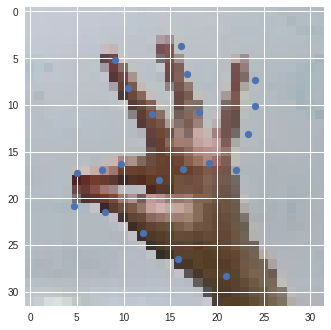

In [46]:
# demo=X_train[1]

# sample = np.array(X_train,'float64')
# mean_image = np.mean(sample, axis=0)
# sample -= mean_image

# Load the raw image data
image_dir = "test-32data.save"

data = pickle.load(open(image_dir, 'rb'))
X_train, y_train, X_test, y_test = data['data'][:80000],data['label'][:80000],data['data'][80000:],data['label'][80000:]

demo=X_test[1000]

sample = np.array(X_test,'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image


predictions = model.predict(sample)
out = predictions[1000].reshape(-1, 21, 2)

print(out.shape)
# print(out[0])
# pdb.set_trace()

plt.imshow(cv2.cvtColor(demo, cv2.COLOR_BGR2RGB))
plt.scatter(out[0][:, 1], out[0][:, 0])
plt.show()